In [13]:
import pandas as pd
from plotnine import *

In [2]:
df = pd.read_csv('df_filled.csv')

In [3]:
df.head()

,address,lat,lng,구,년도,업소명,업종명,업태명,영업자시작년도,영업자시작일,폐업년도,폐업일자
0,서울특별시 은평구 신사동 17번지 11호 2층,37.598980,126.910005,은평구,2014.0,2월7일,일반음식점,호프/통닭,2014.0,20140224.0,NaN,NaN
1,서울특별시 은평구 수색동 75번지 DMC 자이상가 1층108호,37.579561,126.898666,은평구,2014.0,오봉도시락,휴게음식점,일반조리판매,2014.0,20141010.0,NaN,NaN
2,서울특별시 은평구 대조동 185번지 16호,37.618575,126.921100,은평구,1999.0,명송회집,일반음식점,분식,2013.0,20130308.0,2013.0,20131220.0
3,"서울특별시 은평구 갈현동 506번지 9호 103,104호",37.616395,126.912951,은평구,2013.0,장충왕족발보쌈,일반음식점,호프/통닭,2013.0,20130808.0,2014.0,20141226.0
4,서울특별시 은평구 응암동 72번지 3호 1층,37.600772,126.929972,은평구,2016.0,예쁜 뽀들이 함바,일반음식점,한식,2016.0,20161129.0,NaN,NaN


In [27]:
def seoul_map(df, year, area=None, place=None, status='on_sale'):
    
    if status == 'on_sale':
        df_seoul = df.loc[(df['영업자시작년도'] <= year) & ((df['폐업년도'] > year) | df['폐업년도'].isnull())]
    elif status == 'opened':
        df_seoul = df.loc[df['영업자시작년도'] == year]
    elif status == 'closed':
        df_seoul = df.loc[df['폐업년도'] == year]
    else:
        return 'MEONG-CHEONG-EE~!!! Choose and submit one among on_sale or opened or closed or None-!'
    
    if area is not None:
        df_seoul = df_seoul.loc[df_seoul['구'] == area]
    elif place is not None:
        df_seoul = df_seoul[df_seoul['address'].str.contains(place)]
    else:
        return df_seoul
    
    return df_seoul

In [30]:
font_name = 'NanumGothic'

C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\rlath\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 282 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


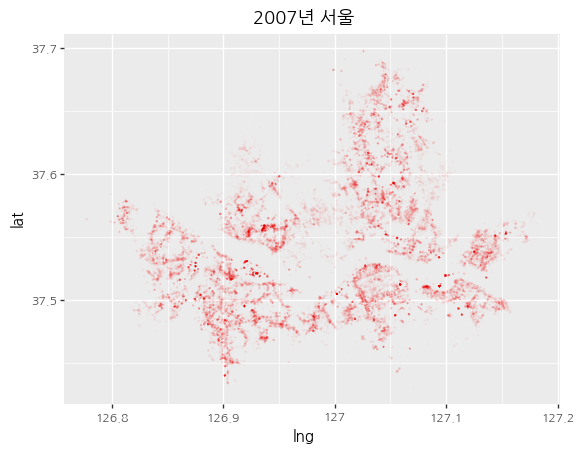

<ggplot: (131844070664)>

In [31]:
df_seoul_2007 = seoul_map(df, 2007)

(ggplot(df_seoul_2007[['lng', 'lat']])
 + aes(x='lng', y='lat')
 + geom_point(size=0.01, alpha=0.01, color='red')
 + ggtitle('2007년 서울')
 + theme(text=element_text(family=font_name))
)

C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\rlath\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 214 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


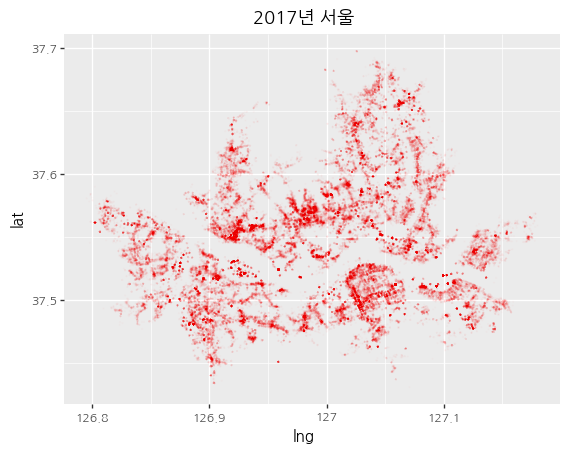

<ggplot: (131844089727)>

In [32]:
df_seoul_2017 = seoul_map(df, 2017)

(ggplot(df_seoul_2017[['lng', 'lat']])
 + aes(x='lng', y='lat')
 + geom_point(size=0.01, alpha=0.01, color='red')
 + ggtitle('2017년 서울')
 + theme(text=element_text(family=font_name))

)

C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\rlath\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 30 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


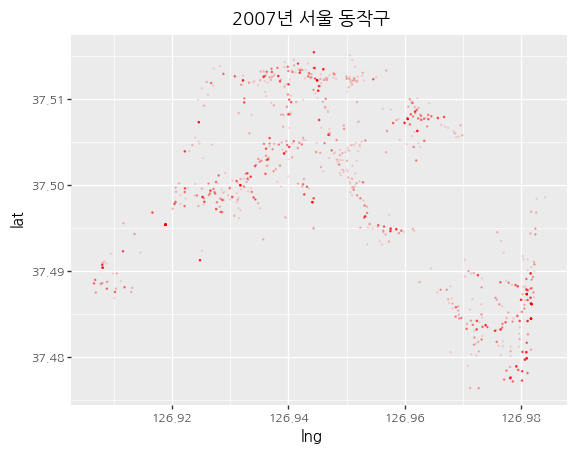

<ggplot: (-9223371905010860649)>

In [33]:
df_dj_2007 = seoul_map(df, 2007, area='동작구')

(ggplot(df_dj_2007[['lng', 'lat']])
 + aes(x='lng', y='lat')
 + geom_point(size=0.01, alpha=0.1, color='red')
 + ggtitle('2007년 서울 동작구')
 + theme(text=element_text(family=font_name))
)

C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\rlath\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 12 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


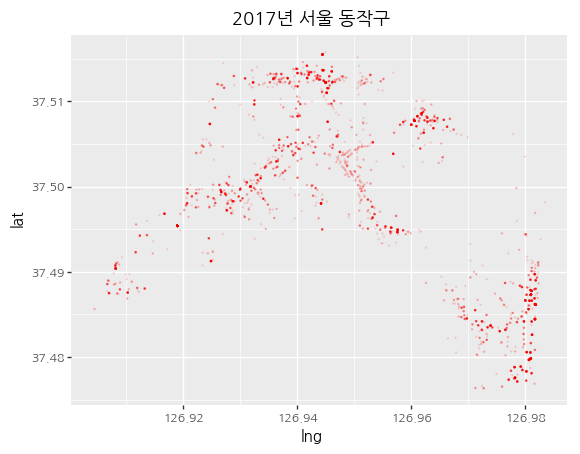

<ggplot: (131847577124)>

In [34]:
df_dj_2017 = seoul_map(df, 2017, area='동작구')

(ggplot(df_dj_2017[['lng', 'lat']])
 + aes(x='lng', y='lat')
 + geom_point(size=0.01, alpha=0.1, color='red')
 + ggtitle('2017년 서울 동작구')
 + theme(text=element_text(family=font_name))
)

C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


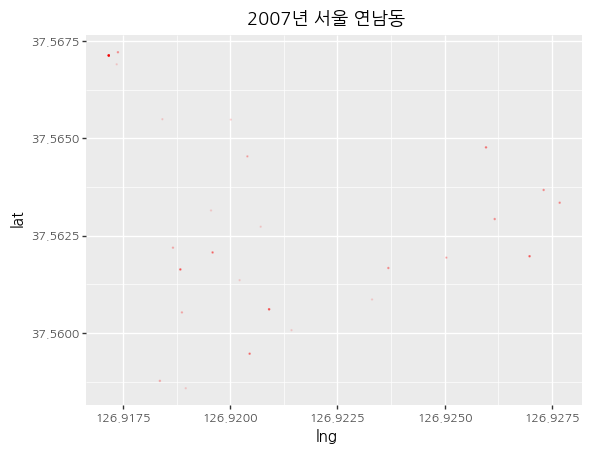

<ggplot: (131844089720)>

In [36]:
df_yn_2007 = seoul_map(df, 2007, place='연남동')

(ggplot(df_yn_2007[['lng', 'lat']])
 + aes(x='lng', y='lat')
 + geom_point(size=0.01, alpha=0.1, color='red')
 + ggtitle('2007년 서울 연남동')
 + theme(text=element_text(family=font_name))
)

C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\rlath\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


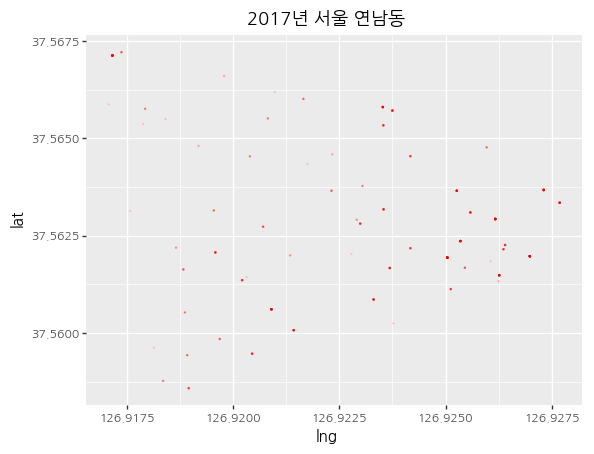

<ggplot: (-9223371905009634458)>

In [37]:
df_yn_2017 = seoul_map(df, 2017, place='연남동')

(ggplot(df_yn_2017[['lng', 'lat']])
 + aes(x='lng', y='lat')
 + geom_point(size=0.01, alpha=0.1, color='red')
 + ggtitle('2017년 서울 연남동')
 + theme(text=element_text(family=font_name))
)